In [2]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sn

In [3]:
df=pd.read_csv('health.csv')

In [4]:
df.head()

,Area,pct_2014,pct_2013,Xrows,Ycols
0,Houston,0.19,0.22,1,1
1,Miami,0.19,0.24,1,2
2,Dallas,0.18,0.21,1,3
3,San Antonio,0.15,0.19,1,4
4,Atlanta,0.15,0.18,1,5


In [5]:
df.shape

(25, 5)

In [6]:
area=(np.asarray(df['Area'])).reshape(5,5)
pct14=(np.asarray(df['pct_2014'])).reshape(5,5)
pct13=(np.asarray(df['pct_2013'])).reshape(5,5)
print(area)
print(pct14)
print(pct13)

[['Houston' 'Miami' 'Dallas' 'San Antonio' 'Atlanta']
 ['Los Angeles' 'Tampa' 'Riverside, Calif.' 'Phoenix' 'Charlotte']
 ['San Diego' 'All Metro Areas' 'Chicago' 'New York' 'Denver']
 ['Washington, D.C.' 'Portland' 'St. Louis' 'Detroit' 'Philadelphia']
 ['Seattle' 'San Francisco' 'Baltimore' 'Pittsburgh' 'Minneapolis']]
[[0.19 0.19 0.18 0.15 0.15]
 [0.14 0.14 0.14 0.13 0.13]
 [0.12 0.11 0.11 0.1  0.1 ]
 [0.09 0.09 0.09 0.09 0.08]
 [0.08 0.08 0.06 0.06 0.06]]
[[0.22 0.24 0.21 0.19 0.18]
 [0.2  0.17 0.19 0.17 0.15]
 [0.16 0.14 0.14 0.12 0.14]
 [0.11 0.13 0.1  0.11 0.1 ]
 [0.12 0.11 0.09 0.07 0.08]]


In [12]:
result=df.pivot(index='Xrows',values='pct_2013',columns='Ycols')

In [13]:
result

Ycols,1,2,3,4,5
Xrows,,,,,
1,0.22,0.24,0.21,0.19,0.18
2,0.20,0.17,0.19,0.17,0.15
3,0.16,0.14,0.14,0.12,0.14
4,0.11,0.13,0.10,0.11,0.10
5,0.12,0.11,0.09,0.07,0.08


In [14]:
labels=(np.asarray(["{0}\n{1}\n{2}".format(area,pct14,pct13) 
                    for area,pct14,pct13 in zip (area.flatten(),pct14.flatten(),pct13.flatten())])).reshape(5,5)

In [15]:
labels

array([['Houston\n0.19\n0.22', 'Miami\n0.19\n0.24', 'Dallas\n0.18\n0.21',
        'San Antonio\n0.15\n0.19', 'Atlanta\n0.15\n0.18'],
       ['Los Angeles\n0.14\n0.2', 'Tampa\n0.14\n0.17',
        'Riverside, Calif.\n0.14\n0.19', 'Phoenix\n0.13\n0.17',
        'Charlotte\n0.13\n0.15'],
       ['San Diego\n0.12\n0.16', 'All Metro Areas\n0.11\n0.14',
        'Chicago\n0.11\n0.14', 'New York\n0.1\n0.12',
        'Denver\n0.1\n0.14'],
       ['Washington, D.C.\n0.09\n0.11', 'Portland\n0.09\n0.13',
        'St. Louis\n0.09\n0.1', 'Detroit\n0.09\n0.11',
        'Philadelphia\n0.08\n0.1'],
       ['Seattle\n0.08\n0.12', 'San Francisco\n0.08\n0.11',
        'Baltimore\n0.06\n0.09', 'Pittsburgh\n0.06\n0.07',
        'Minneapolis\n0.06\n0.08']], dtype='<U27')

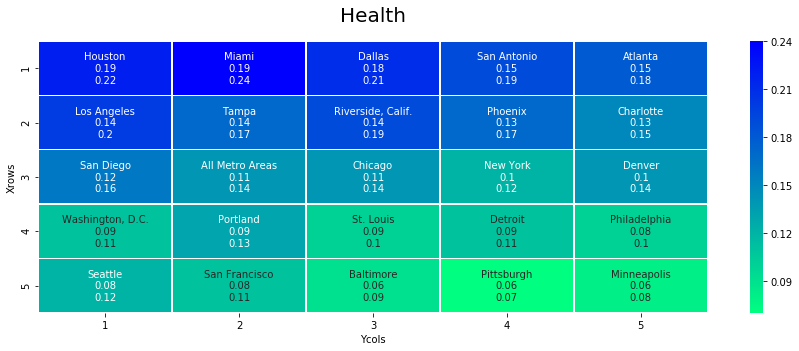

In [18]:
#Heat map
fig,ax=plt.subplots(figsize=(15,5))
title="Health"
plt.title(title,fontsize=20)
tt1=ax.title
tt1.set_position([0.5,1.05])
ax.set_xticks([])
ax.set_yticks([])
sn.heatmap(result,annot=labels,fmt="",cmap='winter_r',linewidths=0.30,ax=ax)
plt.show()